##### 在這個練習中，我嘗試利用sklearn底下的迴歸係數來計算下列每個變項對應到y值的預測能力，而每個變項的回答皆為0~5的ranking
| 潛在變項  | 觀察變項 | 題項 |
|--------|------|------|
| 內在動機   | 自我成長/自我實現  `self growth`| 我透過學習來發展新的技能、知識和能力，以 實現自己的目標和夢想。|
|   | 興趣和熱情 `interest` |我對特定主題或領域很感興趣，並透過學習它 們而感到滿足。|
|   | 學習需求/好奇心 `Curiosity` |我對解決問題、獲取新知識和理解世界感到好 奇，並因此主動尋求學習的機會。|
|   | 自我效能感 `self_efficient`|學習時，我相信自己有能力克服各種困難、完 成特定任務或達到目標。|
|   | 成就感/自我肯定 `Achievement` |成就感是我學習的動力。|
|   | 自主性/控制權`Control`| 我喜歡安排並逐一完成自己的學習目標及進 度。 |
|   | 挑戰性/刺激感 `Challenge`| 我學習是因為享受學習所帶來的挑戰性和刺激 感。 |
| 外在動機   | 認同感追求 `Approval`|我學習是為了獲得他人的認可。|
|   | 獎賞 `Reward`| 我學習是為了獲得獎勵 (如: 獎學金、新手 機、.....)。|
|   | 避免壓力`Stress`|我學習是為了避免來自他人的壓力。(如: 家人的責備、同儕的嘲笑、師長的要求......)|
|   | 處罰`Challenge`|我學習是為了避免處罰。 (如: 被打罵、被扣零用錢......)|
|   | 社會期望和角色 | 我學習是為了符合他人的期望。(如: 成為一個好學生、取得好成績、達到某種 職業目標......)|
|   | 競爭和比較|我學習是為了比他人更優秀。|


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/ake/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
grade = pd.read_csv(
    "grade.csv") 

##### 引入sklearn底下的線性迴歸 

In [3]:
from sklearn.linear_model import LinearRegression
lr_estimator = LinearRegression()

##### 檢查資料型態

In [4]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   self_growth         115 non-null    int64 
 1   interest            115 non-null    int64 
 2   Curiosity           115 non-null    int64 
 3   self_efficient      115 non-null    int64 
 4   Achievement         115 non-null    int64 
 5   Control             115 non-null    int64 
 6   Challenge           115 non-null    int64 
 7   Approval            115 non-null    int64 
 8   Reward              115 non-null    int64 
 9   Stress              115 non-null    int64 
 10  Punishment          115 non-null    int64 
 11  social_expectation  115 non-null    int64 
 12  Superiority         115 non-null    int64 
 13  time_management     115 non-null    object
 14  Goal                115 non-null    object
 15  self_encouragement  115 non-null    object
 16  Grade               115 no

##### 將特徵分成特徵x與標記y兩個資料框
`x` 包含的特徵分成內在動機與外在動機：
1. 內在動機：\
`自我成長（self_growth）`、`興趣/熱情（interest）`、`學習需求/好奇心（Curiosity）`、`自我效能（self_efficient）`\
`成就感（Achievement）`、`自主控制權（Control）`、`挑戰刺激感（Challenge）`
2. 外在動機：\
`認同感（Approval）`、`獎賞（Reward）`、`壓力避免（Stress）`、`處罰（Punishment)`\
`社會期望（social_expectation）`、`競爭和比較（Superiority）`

`y` 則為學生於上學期的平均分數區間`Score`

In [5]:
y = grade["Score"]
x = grade.drop(
    columns = ["time_management", "Goal",
               "self_encouragement", "Grade",
               "Gender", "Score", "Else", "Email"])

In [6]:
from collections import Counter

def counts(data):
    counts_data = {}
    for name in x.columns:
        counts_data[name] = data[name].value_counts().sort_index()
            
    return counts_data

x_counts = counts(x)

##### 藉由繪製出不同變項在每個選項中的填答數量，觀察哪些變項佔據了高分群（可初步解讀為「影響較大」之特徵）
目前看似有`superiority`、`Achievement`、`self_growth`、`social_expectation`和`Challenge`

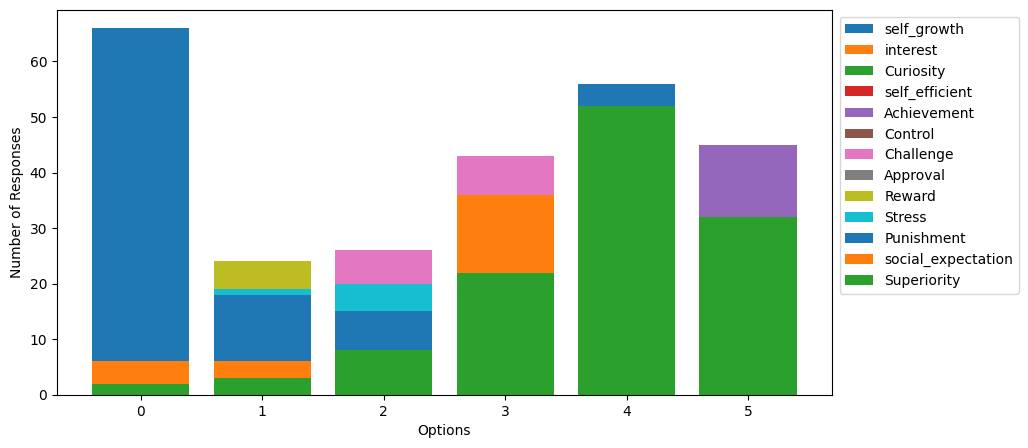

In [7]:
def plot_bar(counts_data):
    plt.figure(figsize=(10, 5)) 
    for name, counts in counts_data.items():
        plt.bar(counts.index, counts.values, label=name)
    plt.xlabel("Options")
    plt.ylabel("Number of Responses")
    plt.legend(loc="upper right", bbox_to_anchor=(1.25,1)) 

plot_bar(x_counts)

##### 將資料 fit 後算出 intercept 和 Coefficients，並將 Coefficients 視覺化以檢查哪些特徵較具有影響力。

In [8]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
transformer = OrdinalEncoder()
y_new = transformer.fit_transform(y.values.reshape(-1, 1))
_ = lr_estimator.fit(x, y_new)

In [9]:
print("Intercept:", lr_estimator.intercept_)
print("Coefficients:", lr_estimator.coef_)

Intercept: [3.35955018]
Coefficients: [[ 0.39377406 -0.11471359  0.05312228  0.02451579  0.01218014  0.14405134
  -0.01841071  0.26507591  0.07560431 -0.18561294 -0.09888477  0.12474531
  -0.0698698 ]]


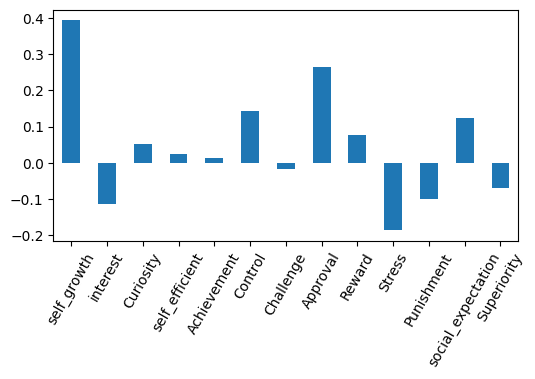

In [10]:
coef_flat = lr_estimator.coef_.flatten()
_ = pd.Series(
    coef_flat,
    index = x.columns).plot.bar(
    rot = 60,
    figsize = (6, 3))

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr_estimator.predict(x)
print('Mean Squared Error: %.2f' % 
      mean_squared_error(y_new, y_pred))
print('Coefficient of Determination: %.2f' % 
      r2_score(y_new, y_pred))

Mean Squared Error: 2.01
Coefficient of Determination: 0.15


##### 資料初步解讀
因為是自己收的data，受限於方便樣本的特性，恐怕不太能作為預測模型的資料庫，因此模型的解釋能力很差，未來可透過正則化或依據理論將特定特徵丟入模型的方式改善。不過，透過計算係數並將其圖像化的方式，我可以觀察哪些變項最可能影響學生的成績高低。\
係數檢驗的結果顯示「自我成長/自我實現」此變項最具影響力，而我先前曾使用R計算出學生成績越高，會在「自我成長/自我實現」與「學習需求/好奇心」的填答平均上具有正相關。因此，「自我成長/自我實現」變項目前在兩邊是相符合的。